# Comprehensive Analysis of Hospital Mortality

In [166]:
# Importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro, chi2_contingency
from sklearn.impute import SimpleImputer

## Basic Analysis and understanding of the data

In [36]:
#Load the dataset
df = pd.read_csv(r"D:\DSML class\Real world data assignments\Python\Mortatlity Analysis\Hospital Mortality Analysis.csv")

## Observation of the data

In [37]:
print('\nFirst five rows of the dataset')
df.head(5)


First five rows of the dataset


,ID,outcome,age,gender,BMI,hypertensive,atrialfibrillation,CHD with no MI,diabetes,deficiencyanemias,depression,Hyperlipemia,Renal failure,COPD,heart rate,Systolic blood pressure,Diastolic blood pressure,Respiratory rate,temperature,SPO2
0,125047,0.0,72,1,37.588179,0,0,0,1,1,0,1,1,0,68.837838,155.866667,68.333333,16.621622,36.714286,98.394737
1,139812,0.0,75,2,NaN,0,0,0,0,1,0,0,0,1,101.370370,140.000000,65.000000,20.851852,36.682540,96.923077
2,109787,0.0,83,2,26.572634,0,0,0,0,1,0,0,1,0,72.318182,135.333333,61.375000,23.640000,36.453704,95.291667
3,130587,0.0,43,2,83.264629,0,0,0,0,0,0,0,0,0,94.500000,126.400000,73.200000,21.857143,36.287037,93.846154
4,138290,0.0,75,2,31.824842,1,0,0,0,1,0,0,1,1,67.920000,156.560000,58.120000,21.360000,36.761905,99.280000


In [38]:
df.shape

(1177, 20)

In [39]:
#Getting the overview of the dataset structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1177 entries, 0 to 1176
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        1177 non-null   int64  
 1   outcome                   1176 non-null   float64
 2   age                       1177 non-null   int64  
 3   gender                    1177 non-null   int64  
 4   BMI                       962 non-null    float64
 5   hypertensive              1177 non-null   int64  
 6   atrialfibrillation        1177 non-null   int64  
 7   CHD with no MI            1177 non-null   int64  
 8   diabetes                  1177 non-null   int64  
 9   deficiencyanemias         1177 non-null   int64  
 10  depression                1177 non-null   int64  
 11  Hyperlipemia              1177 non-null   int64  
 12  Renal failure             1177 non-null   int64  
 13  COPD                      1177 non-null   int64  
 14  heart ra

In [40]:
#Checking the summary of numerical columns in the table
df.describe()

,ID,outcome,age,gender,BMI,hypertensive,atrialfibrillation,CHD with no MI,diabetes,deficiencyanemias,depression,Hyperlipemia,Renal failure,COPD,heart rate,Systolic blood pressure,Diastolic blood pressure,Respiratory rate,temperature,SPO2
count,1177.000000,1176.000000,1177.000000,1177.000000,962.000000,1177.000000,1177.000000,1177.000000,1177.000000,1177.000000,1177.000000,1177.000000,1177.000000,1177.000000,1164.000000,1161.000000,1161.000000,1164.000000,1158.000000,1164.000000
mean,150778.120646,0.135204,74.055225,1.525064,30.188278,0.717927,0.451147,0.085811,0.421410,0.338997,0.118946,0.379779,0.365336,0.075616,84.575848,117.995035,59.534497,20.801511,36.677286,96.272900
std,29034.669513,0.342087,13.434061,0.499584,9.325997,0.450200,0.497819,0.280204,0.493995,0.473570,0.323863,0.485538,0.481729,0.264495,16.018701,17.367618,10.684681,4.002987,0.607558,2.298002
min,100213.000000,0.000000,19.000000,1.000000,13.346801,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,36.000000,75.000000,24.736842,11.137931,33.250000,75.916667
25%,125603.000000,0.000000,65.000000,1.000000,24.326461,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,72.371250,105.391304,52.173913,17.925694,36.286045,95.000000
50%,151901.000000,0.000000,77.000000,2.000000,28.312474,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,83.610799,116.128205,58.461538,20.372308,36.650794,96.452273
75%,176048.000000,0.000000,85.000000,2.000000,33.633509,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,95.907143,128.625000,65.464286,23.391200,37.021991,97.917500
max,199952.000000,1.000000,99.000000,2.000000,104.970366,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,135.708333,203.000000,107.000000,40.900000,39.132478,100.000000


In [41]:
#Unique values and it's count unique of categorical columns
print('\nUnique values of categorical columns in admissions table')
(df.select_dtypes(include='object')).nunique()


Unique values of categorical columns in admissions table


Series([], dtype: float64)

## Data Processing

In [42]:
#Checking for missing values
df.isna().sum()

ID                            0
outcome                       1
age                           0
gender                        0
BMI                         215
hypertensive                  0
atrialfibrillation            0
CHD with no MI                0
diabetes                      0
deficiencyanemias             0
depression                    0
Hyperlipemia                  0
Renal failure                 0
COPD                          0
heart rate                   13
Systolic blood pressure      16
Diastolic blood pressure     16
Respiratory rate             13
temperature                  19
SPO2                         13
dtype: int64

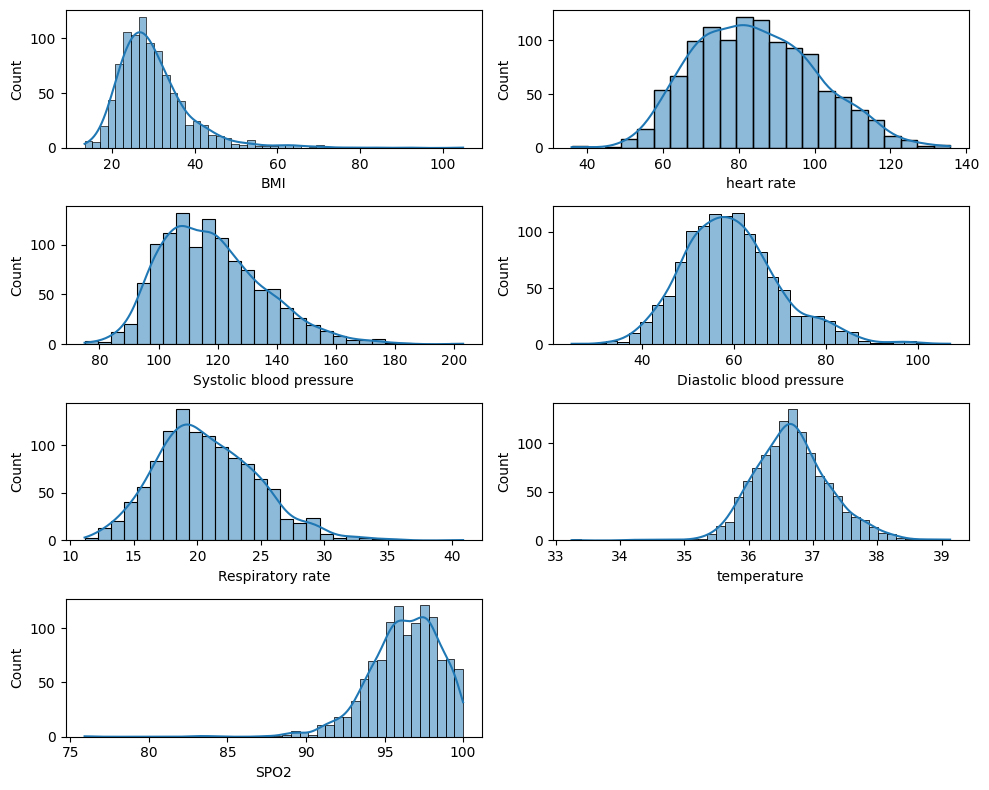

In [43]:
# Checking the distribution of the missing columns
missing_columns = ['BMI', 'heart rate', 'Systolic blood pressure', 'Diastolic blood pressure', 'Respiratory rate', 'temperature', 'SPO2']
plt.figure(figsize=(10,8))
for i, column in enumerate (missing_columns, 1):
    plt.subplot(4,2,i)
    sns.histplot(df[column], kde=True)
    plt.xlabel(column)
plt.tight_layout()
plt.show()

#### Observation:
- Almost all the missing columns are normally distibuted and hence we can use mean to replace the missing values.

In [44]:
#Missing value treatment
imp = SimpleImputer()
for column in missing_columns:
    df[column] = pd.DataFrame(imp.fit_transform(pd.DataFrame(df[column])))

In [45]:
df.isna().sum()

ID                          0
outcome                     1
age                         0
gender                      0
BMI                         0
hypertensive                0
atrialfibrillation          0
CHD with no MI              0
diabetes                    0
deficiencyanemias           0
depression                  0
Hyperlipemia                0
Renal failure               0
COPD                        0
heart rate                  0
Systolic blood pressure     0
Diastolic blood pressure    0
Respiratory rate            0
temperature                 0
SPO2                        0
dtype: int64

In [46]:
#Outcome column is categorical and hence using mode to treat the outlier
mode_imp = SimpleImputer(strategy='most_frequent')
df['outcome'] = pd.DataFrame(mode_imp.fit_transform(pd.DataFrame(df['outcome'])))

C:\Users\shaje\anaconda3\lib\site-packages\sklearn\impute\_base.py:49: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(array)


In [47]:
df.isna().sum()

ID                          0
outcome                     0
age                         0
gender                      0
BMI                         0
hypertensive                0
atrialfibrillation          0
CHD with no MI              0
diabetes                    0
deficiencyanemias           0
depression                  0
Hyperlipemia                0
Renal failure               0
COPD                        0
heart rate                  0
Systolic blood pressure     0
Diastolic blood pressure    0
Respiratory rate            0
temperature                 0
SPO2                        0
dtype: int64

## Mortality rates by Age group and Gender

In [64]:
#Checking the minimum age and maximum to create bins
min_age = df['age'].min()
max_age = df['age'].max()
print(f'Minimum age in the dataset is {min_age} \nMaximum age in the dataset is {max_age}')

Minimum age in the dataset is 19 
Maximum age in the dataset is 99


#### Observation:
- The minmum age shows that the children below 19 years of age are not admitted to the hospital and pediatric care facility is not available.

In [72]:
#Binning ages in to ae groups
df['age_group'] = pd.cut(df['age'], bins=[18, 30, 40, 50, 60, 70, 80, 90, 100], labels=['19-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100'])

In [49]:
#Converting 0 and 1 to corresponding gender values
gender_map={1: 'Female', 2: 'Male'}
df['gender'] = df['gender'].map(gender_map)

### Mortality rate by gender

In [50]:
#Finding mortality rate by gender
gender_mortality_rate = pd.DataFrame(df.groupby('gender')['outcome'].mean()*100).reset_index()
gender_mortality_rate['outcome'] = round(gender_mortality_rate['outcome'],2)
gender_mortality_rate

,gender,outcome
0,Female,14.31
1,Male,12.78


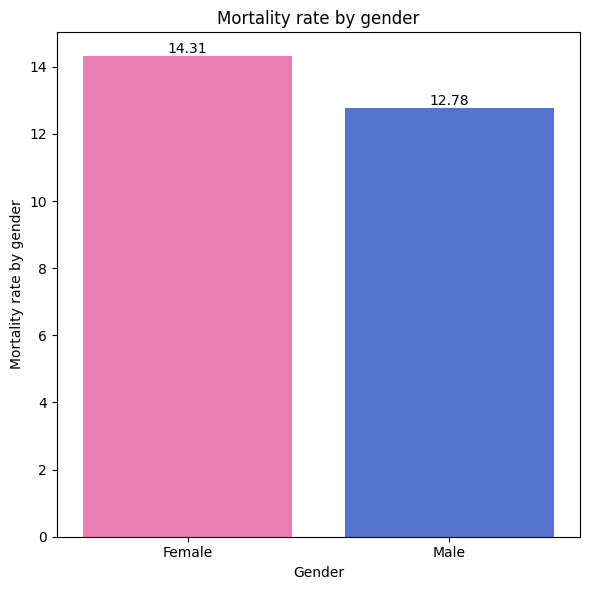

In [51]:
#Plotting the distribution of mortality rates by gender
plt.figure(figsize=(6,6))
ax = sns.barplot(data=gender_mortality_rate, x='gender', y='outcome', palette=['hotpink', 'royalblue'])
ax.bar_label(ax.containers[0], fontsize=10)
ax.set(xlabel='Gender', ylabel='Mortality rate in %')
plt.title('Mortality rate by gender')
plt.xlabel('Gender')
plt.ylabel('Mortality rate by gender')
plt.tight_layout()
plt.show()

#### Insights:
- The mortality rate for females with 14.31% is higher than Male with 12.78%

### Mortality rate across Age groups

In [73]:
#Finding mortality rate by age groups
age_mortality_rate = pd.DataFrame(df.groupby('age_group')['outcome'].mean()*100).reset_index()
age_mortality_rate['outcome'] = round(age_mortality_rate['outcome'],2)
age_mortality_rate

,age_group,outcome
0,19-30,25.00
1,31-40,6.25
2,41-50,13.21
3,51-60,10.17
4,61-70,9.82
5,71-80,15.36
6,81-90,14.48
7,91-100,25.93


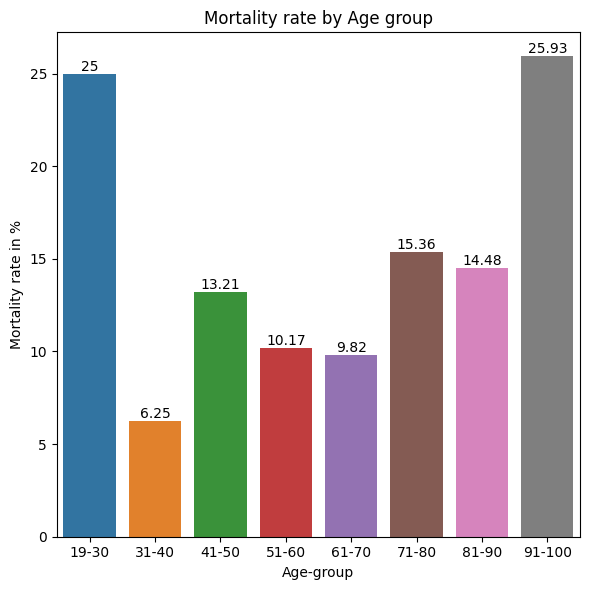

In [74]:
#Plotting the distribution of mortality rates by age group
plt.figure(figsize=(6,6))
ax = sns.barplot(data=age_mortality_rate, x='age_group', y='outcome')
ax.bar_label(ax.containers[0], fontsize=10)
plt.title('Mortality rate by Age group')
plt.xlabel('Age-group')
plt.ylabel('Mortality rate in %')
plt.tight_layout()
plt.show()

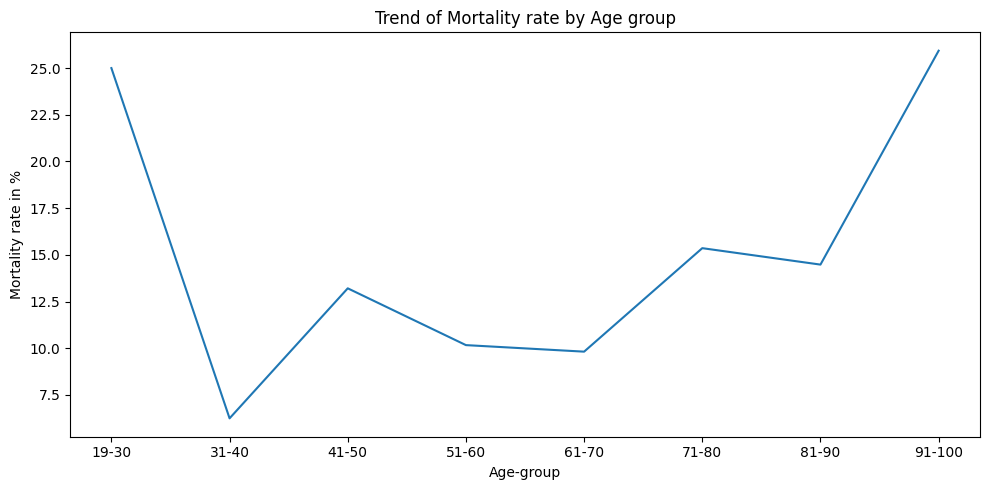

In [75]:
#Plotting the trend of mortality rates by age group
plt.figure(figsize=(10,5))
ax = sns.lineplot(data=age_mortality_rate, x='age_group', y='outcome')
plt.title('Trend of Mortality rate by Age group')
plt.xlabel('Age-group')
plt.ylabel('Mortality rate in %')
plt.tight_layout()
plt.show()

#### Insights:
- The age groups 19-30 and 91-100 has very high mortality rates when compared to other age groups with 25% and 25.93% respectively.
- There's an increasing trend in the mortality rates with the age group.

### Mortality rates across Age groups and Gender

In [76]:
#Finding mortality rate by gender and age groups
mortality_rates = pd.DataFrame(df.groupby(['age_group', 'gender'])['outcome'].mean() * 100).reset_index()
mortality_rates['outcome'] = round(mortality_rates['outcome'],2)
mortality_rates

,age_group,gender,outcome
0,19-30,Female,33.33
1,19-30,Male,0.00
2,31-40,Female,9.09
3,31-40,Male,0.00
4,41-50,Female,14.29
5,41-50,Male,12.00
6,51-60,Female,10.34
7,51-60,Male,10.00
8,61-70,Female,9.48
9,61-70,Male,10.19


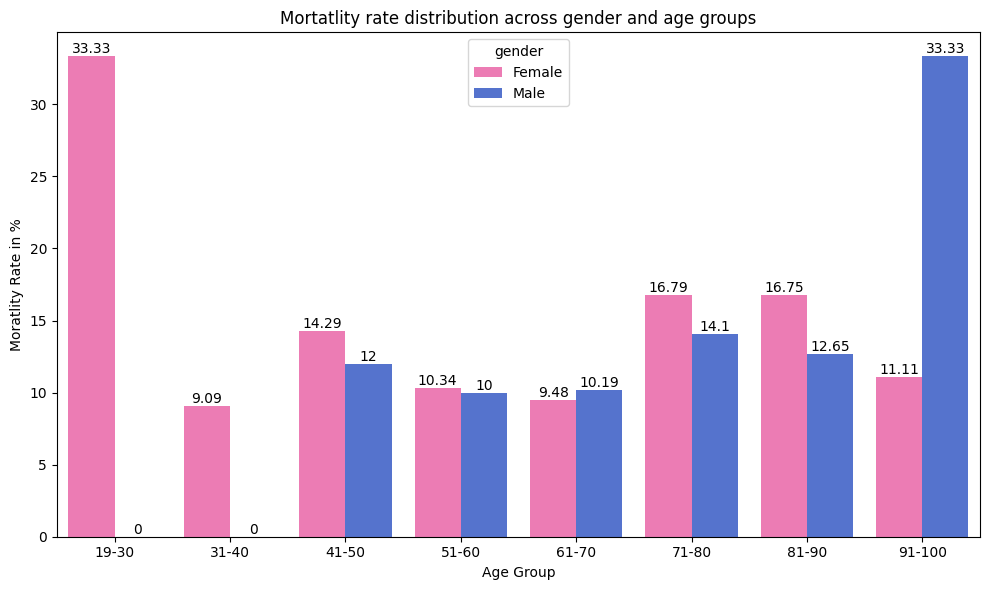

In [77]:
#Plotting the distribution of mortality rates by gender and age groups
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=mortality_rates, x='age_group', y='outcome', hue='gender', palette=['hotpink', 'royalblue'])
for i in ax.containers:
    ax.bar_label(i, fontsize=10)
plt.title('Mortatlity rate distribution across gender and age groups')
plt.xlabel('Age Group')
plt.ylabel('Moratlity Rate in %')
plt.tight_layout()
plt.show()

#### Insights:

1. #### Overall Mortality Rates:
  - The overall mortality rate for females is approximately 14.31%, while for males, it is slightly lower at around 12.78%.
2. #### Age Group Analysis:
  - The mortality rates vary across different age groups.
  - Among females, the highest mortality rate is observed in the 71-80 age group, with a rate of approximately 16.79%. This is followed closely by the 81-90 age group, with a mortality rate of about 16.75%.
  - Among males, the highest mortality rate is also observed in the 71-80 age group, with a rate of around 14.10%. Similar to females, the 81-90 age group has the second-highest mortality rate for males, at approximately 12.65%.
3. #### Gender Analysis:
  - Within each age group, there are differences in mortality rates between genders.
  - For instance, in the 0-18 age group, mortality rates are not available (NaN) for both females and males, indicating a lack of data or no recorded deaths in this age group.
  - In the 19-30 age group, females have a mortality rate of 33.33%, while males have a mortality rate of 0.00%. This suggests a significant difference in mortality rates between genders in this age group.
 - In older age groups (e.g., 71-80 and 81-90), while both genders generally experience higher mortality rates compared to younger age groups, there is still variability between males and females.

## Admission rates by Age groups

In [102]:
#calculating the Admission rates
admission_rates = df.groupby('age_group')['ID'].count()/df.shape[0]*100
admission_rates

age_group
19-30      0.339847
31-40      1.359388
41-50      4.502974
51-60     10.025489
61-70     19.031436
71-80     24.893798
81-90     37.553101
91-100     2.293968
Name: ID, dtype: float64

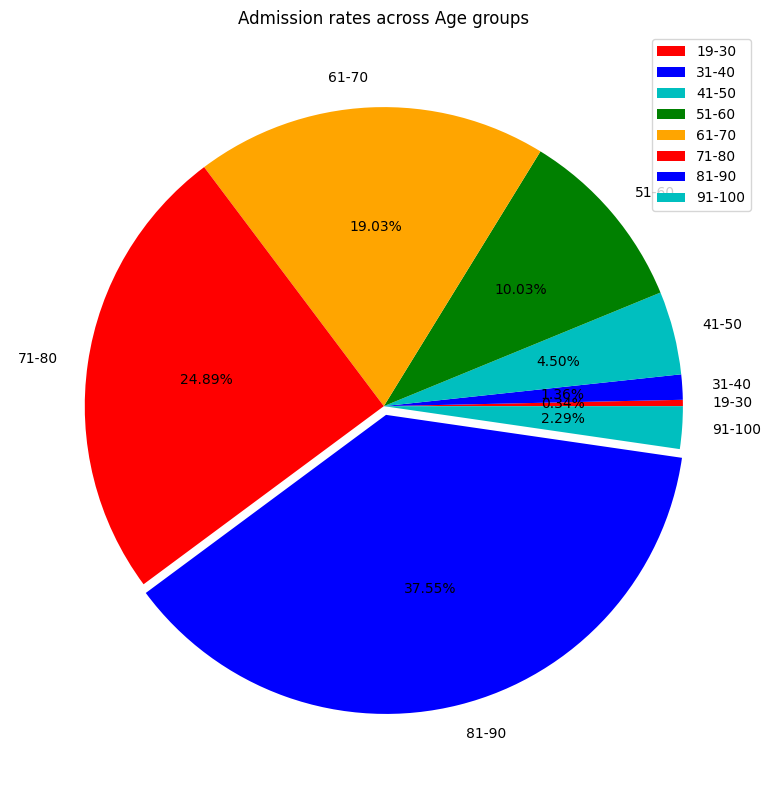

In [116]:
# Plotting the admission rates
plt.figure(figsize=(8,8))
admission_rates.plot(kind='pie',
                     autopct='%1.2f%%',
                     legend=True,
                     explode = (0, 0, 0, 0, 0, 0, 0.03, 0),
                     colors=['r','b','c','g', 'orange'],
                     ylabel='')
plt.title('Admission rates across Age groups')
plt.tight_layout()
plt.show()

#### Insights:
- The data indicates a clear trend of increasing admission rates with age, especially from the age group 51-60 onwards. The highest admission rates are seen in the 81-90 age group, accounting for approximately 37.55% of all admissions.
- The 71-80 age group also accounts for a substantial proportion of admissions, with about 24.89%. Together with the 81-90 age group, these two categories comprise over 60% of all admissions.
- The youngest age group (19-30) and the oldest (91-100) have the lowest admission rates at approximately 0.34% and 2.29%, respectively. This suggests lower overall health risk or fewer critical issues requiring hospitalization in these age groups compared to others.
- Given the high admission rates in the 71-90 age range, there should be a significant emphasis on geriatric care, including specialized staff training, adequate medication supply, and equipment tailored for older patients. Facilities such as mobility aids, geriatric-friendly wards, and easy access to chronic disease management should be prioritized.
- Older adults often suffer from chronic conditions such as diabetes, hypertension, and heart disease. Enhancing chronic disease management programs can help manage these conditions better and potentially reduce hospital admissions.
- With higher admission rates in the older population, efficient emergency services and rapid response teams are crucial. These services should be equipped to handle common geriatric emergencies.

## Analysis on medical conditions

In [134]:
#Calculating the % of patients with each medical condition
conditions = ['hypertensive', 'atrialfibrillation', 'CHD with no MI', 'diabetes', 'deficiencyanemias', 'depression', 'Hyperlipemia', 'Renal failure', 'COPD']
condition_percentage = {}
total_patients = df.shape[0]

for condition in conditions:
    condition_percentage[condition] = df[condition].sum()/total_patients * 100
    
condition_percentage_df = pd.DataFrame(condition_percentage.items(), columns=['condition', 'percentage'] )
condition_percentage_df

,condition,percentage
0,hypertensive,71.792693
1,atrialfibrillation,45.114698
2,CHD with no MI,8.581138
3,diabetes,42.141037
4,deficiencyanemias,33.899745
5,depression,11.894647
6,Hyperlipemia,37.977910
7,Renal failure,36.533560
8,COPD,7.561597


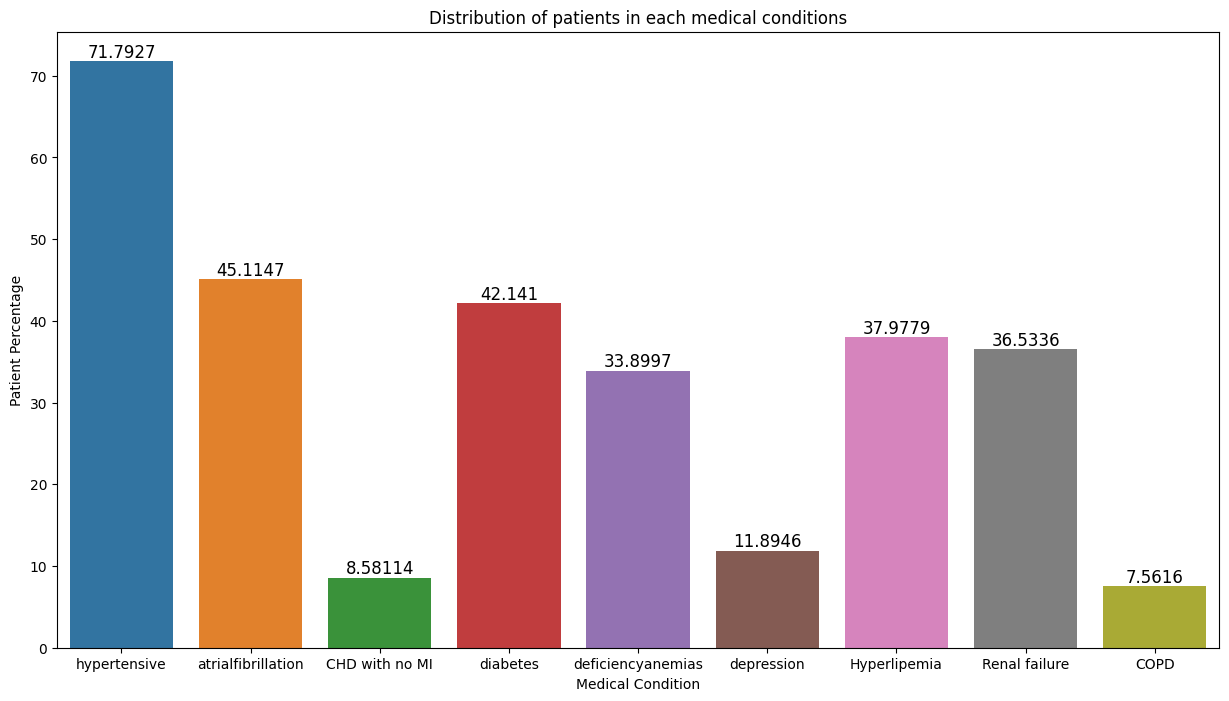

In [150]:
plt.figure(figsize=(15,8))
ax = sns.barplot(data=condition_percentage_df, x='condition', y='percentage')
ax.bar_label(ax.containers[0], fontsize=12)
plt.title('Distribution of patients in each medical conditions')
plt.xlabel('Medical Condition')
plt.ylabel('Patient Percentage')
plt.show()

#### Insights:
- Hypertensive conditions are the most common, with approximately 71.79% of patients affected. This indicates a widespread issue and underscores the importance of resources for managing blood pressure, such as medication, monitoring equipment, and educational programs on lifestyle changes.
- Atrial fibrillation (45.11%) and diabetes (42.14%) are also notably prevalent. These conditions require significant medical attention and resources, including specialized staff (cardiologists and endocrinologists), diagnostic equipment, and ongoing patient education programs.
- With Hyperlipemia at approximately 37.98% and renal failure at 36.53%, there's a need for dietary management services, lipid-lowering treatments, and renal care facilities, including dialysis centers and nephrology expertise.
- Moderate Prevalence of Deficiency Anemias affect about 33.90% of the patient population.
- Lower Prevalence of Depression and COPD is seen among the patients with 11.89% and 7.56% respectively but are still significant

## Comorbidity Analysis

In [158]:
#Filtering the medical conditions columns to find the correlation
conditions_df = df[conditions]
cor_mat = conditions_df.corr()

<Axes: >

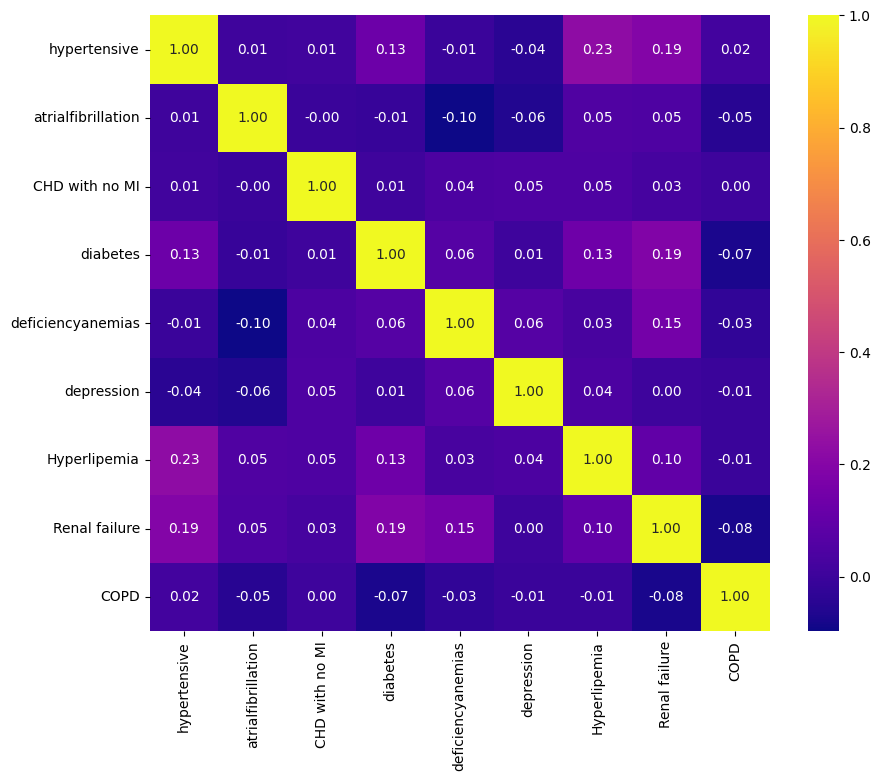

In [162]:
#Plotting the correlation matrix
plt.figure(figsize=(10,8))
sns.heatmap(cor_mat, annot=True, fmt='.2f', cmap='plasma')

#### Insights:
1. #### Hypertension and Hyperlipemia:

  - There's a moderate positive correlation (0.226) between being hypertensive and having hyperlipemia. This suggests that patients with hypertension are more likely to also have high lipid levels in their blood. These conditions are both risk factors for cardiovascular diseases, so their co-occurrence is clinically relevant.
2. #### Hypertension and Renal Failure:

  - There's a noticeable positive correlation (0.193) between hypertension and renal failure. This aligns with medical knowledge, as chronic hypertension can lead to kidney damage over time, resulting in renal failure.
3. #### Diabetes and Renal Failure:

  - There's a significant positive correlation (0.189) between diabetes and renal failure. This is another clinically significant finding since diabetes is a well-known risk factor for the development of kidney disease.
4. #### Deficiency Anemias and Renal Failure:

  - A modest positive correlation (0.150) exists between deficiency anemias and renal failure. Renal failure can contribute to anemia due to the kidneys' reduced ability to produce erythropoietin, a hormone that is critical for red blood cell production.
5. #### Diabetes and Hyperlipemia:

  - The correlation (0.133) between diabetes and hyperlipemia is positive, suggesting a higher likelihood of co-occurrence. Both conditions are components of metabolic syndrome, which increases cardiovascular risk.

### Indepth Statistical Analysis

#### Hypertension and Hyperlipemia

In [168]:
#Creating contingency table and performing Chi2 text
contingency_table_1 = pd.crosstab(df['hypertensive'], df['Hyperlipemia'])
chi2, p, _, _ = chi2_contingency(contingency_table_1)

print(f'Chi squared test result:\nChi2 = {chi2}\np_value = {p}')

Chi squared test result:
Chi2 = 59.067420916239755
p_value = 1.5236106069342537e-14


#### Interpretation:
- The p-value is far below the typical alpha level of 0.05 (often even below 0.01), indicating that the association between hypertension and hyperlipemia is statistically significant. This means there is a very low probability that the observed association is due to random chance.

#### Hypertension and Renal Failure

In [173]:
#Creating contingency table and performing Chi2 text
contingency_table_2 = pd.crosstab(df['hypertensive'], df['Renal failure'])
chi2, p, _, _ = chi2_contingency(contingency_table_2)

print(f'Chi squared test result:\nChi2 = {chi2}\np_value = {p}')

Chi squared test result:
Chi2 = 43.07570893689637
p_value = 5.266204569977199e-11


#### Interpretation:
- The extremely low p-value suggests that the likelihood of observing this strong association between hypertension and renal failure by chance is minimal. Therefore, the result is considered statistically significant.


#### Diabetes and Renal Failure

In [175]:
#Creating contingency table and performing Chi2 text
contingency_table_3 = pd.crosstab(df['diabetes'], df['Renal failure'])
chi2, p, _, _ = chi2_contingency(contingency_table_3)

print(f'Chi squared test result:\nChi2 = {chi2}\np_value = {p}')

Chi squared test result:
Chi2 = 41.096768650578646
p_value = 1.4487565664741686e-10


#### Interpretation:
- The very low p-value signifies that the observed association between diabetes and renal failure is statistically significant and unlikely to be due to chance.

#### Deficiency Anemias and Renal Failure

In [176]:
#Creating contingency table and performing Chi2 text
contingency_table_4 = pd.crosstab(df['deficiencyanemias'], df['Renal failure'])
chi2, p, _, _ = chi2_contingency(contingency_table_4)

print(f'Chi squared test result:\nChi2 = {chi2}\np_value = {p}')

Chi squared test result:
Chi2 = 25.813621004915767
p_value = 3.760254454875793e-07


#### Interpretation
- The extremely low p-value confirms that the relationship observed is statistically significant, strongly suggesting it's not due to random variation.

#### Diabetes and Hyperlipemia

In [178]:
#Creating contingency table and performing Chi2 text
contingency_table_5 = pd.crosstab(df['diabetes'], df['Hyperlipemia'])
chi2, p, _, _ = chi2_contingency(contingency_table_5)

print(f'Chi squared test result:\nChi2 = {chi2}\np_value = {p}')

Chi squared test result:
Chi2 = 20.394355196470183
p_value = 6.301539752354187e-06


#### Interpretation
- The very low p-value suggests that the association between diabetes and hyperlipemia is statistically significant. This means that the observed relationship is unlikely to be due to random chance.

### Recommendations

1. #### Hypertension and Hyperlipemia:

 - There is a significant association between hypertension and hyperlipemia, suggesting that patients with hypertension are more likely to have high lipid levels in their blood. This highlights the importance of comprehensive cardiovascular risk management in patients with hypertension.
2. #### Hypertension and Renal Failure:

 - The strong statistical association between hypertension and renal failure underscores the need for proactive monitoring of renal function in hypertensive patients. Early detection and intervention can help prevent or delay the progression of kidney disease.
3. #### Diabetes and Renal Failure:

 - The significant association between diabetes and renal failure emphasizes the heightened risk of kidney disease in diabetic patients. Regular renal screenings and tight glycemic control are essential to mitigate this risk.
4. #### Deficiency Anemias and Renal Failure:

 - The observed association between deficiency anemias and renal failure highlights the importance of considering renal health in the management of anemic patients. Nutritional support and close monitoring of renal function are key in this population.
5. #### Diabetes and Hyperlipemia:

 - The moderate association between diabetes and hyperlipemia suggests that diabetic patients are at increased risk of dyslipidemia. Comprehensive diabetes management should include screening and management of lipid levels to reduce cardiovascular risk.

## Vital Signs Analysis

In [189]:
#Segmenting the live and deceased patients data
alive_df = df[df['outcome'] == 0]
deceased_df = df[df['outcome'] == 1]

vitals = ['heart rate', 'Systolic blood pressure', 'Diastolic blood pressure', 'Respiratory rate', 'temperature', 'SPO2']

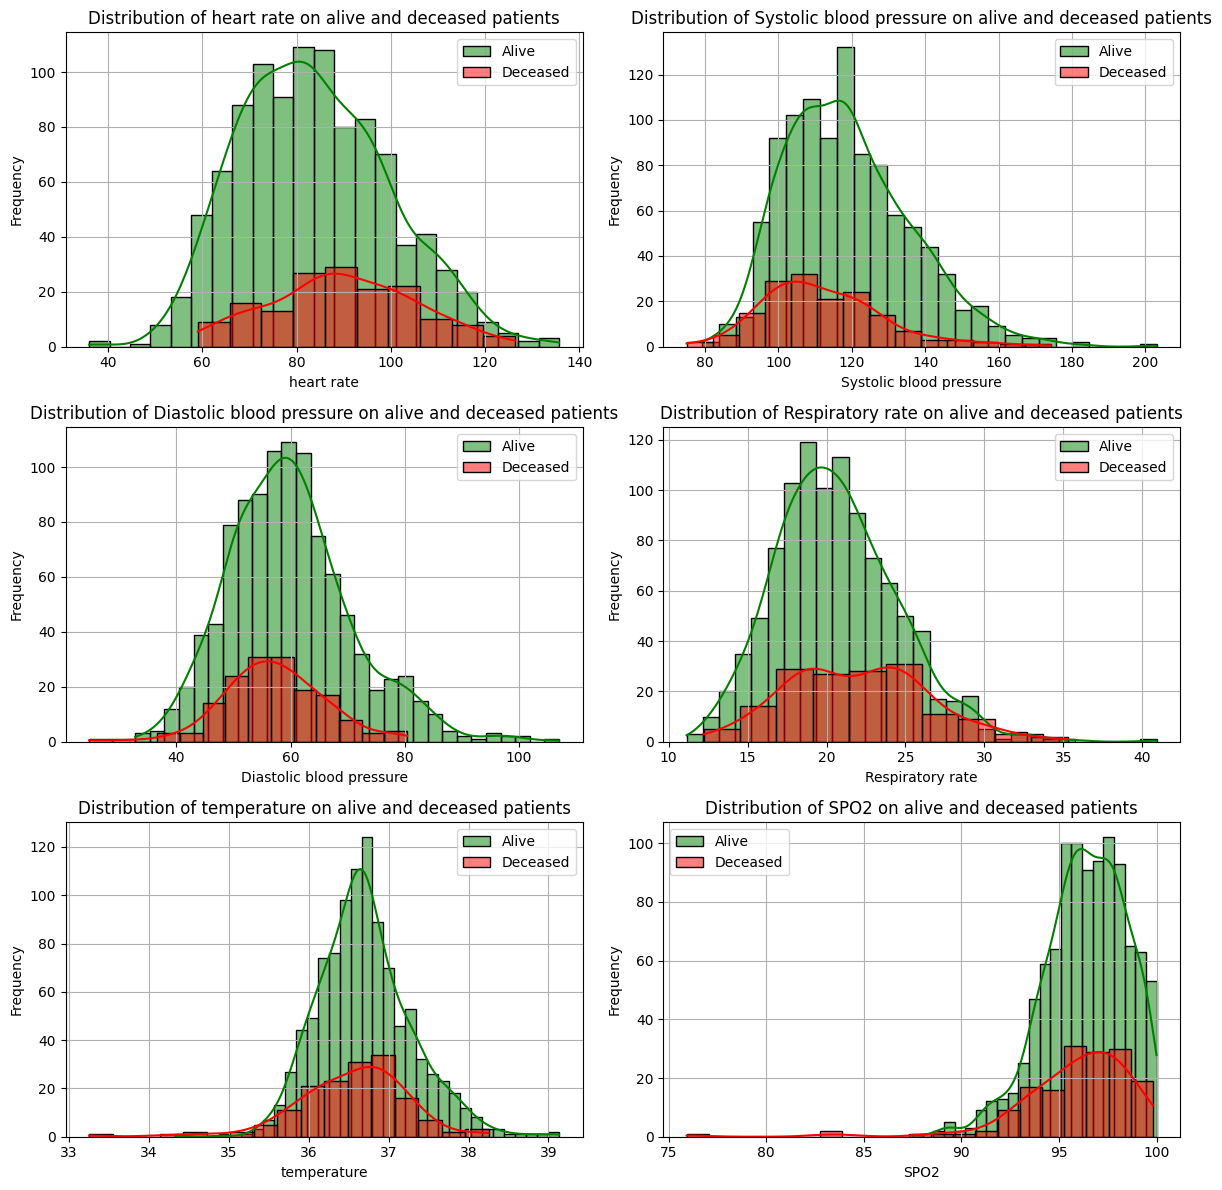

In [216]:

plt.figure(figsize=(12,12))
for i,vital in enumerate(vitals, 1):
    plt.subplot(3,2,i)
    sns.histplot(data=alive_df, x=vital, kde=True, color='g', label='Alive')
    sns.histplot(data=deceased_df, x=vital, kde=True, color='r', label='Deceased')
    plt.title(f'Distribution of {vital} on alive and deceased patients')
    plt.xlabel(vital)
    plt.ylabel('Frequency')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
plt.show()
    

In [217]:
# Documenting the normal range of vital signs after conducting a research
normal_range = {
    'heart rate': (60,100),
    'Systolic blood pressure': (90, 120),
    'Diastolic blood pressure': (60, 80),
    'Respiratory rate': (12, 20),
    'SPO2': (95, 100)
}

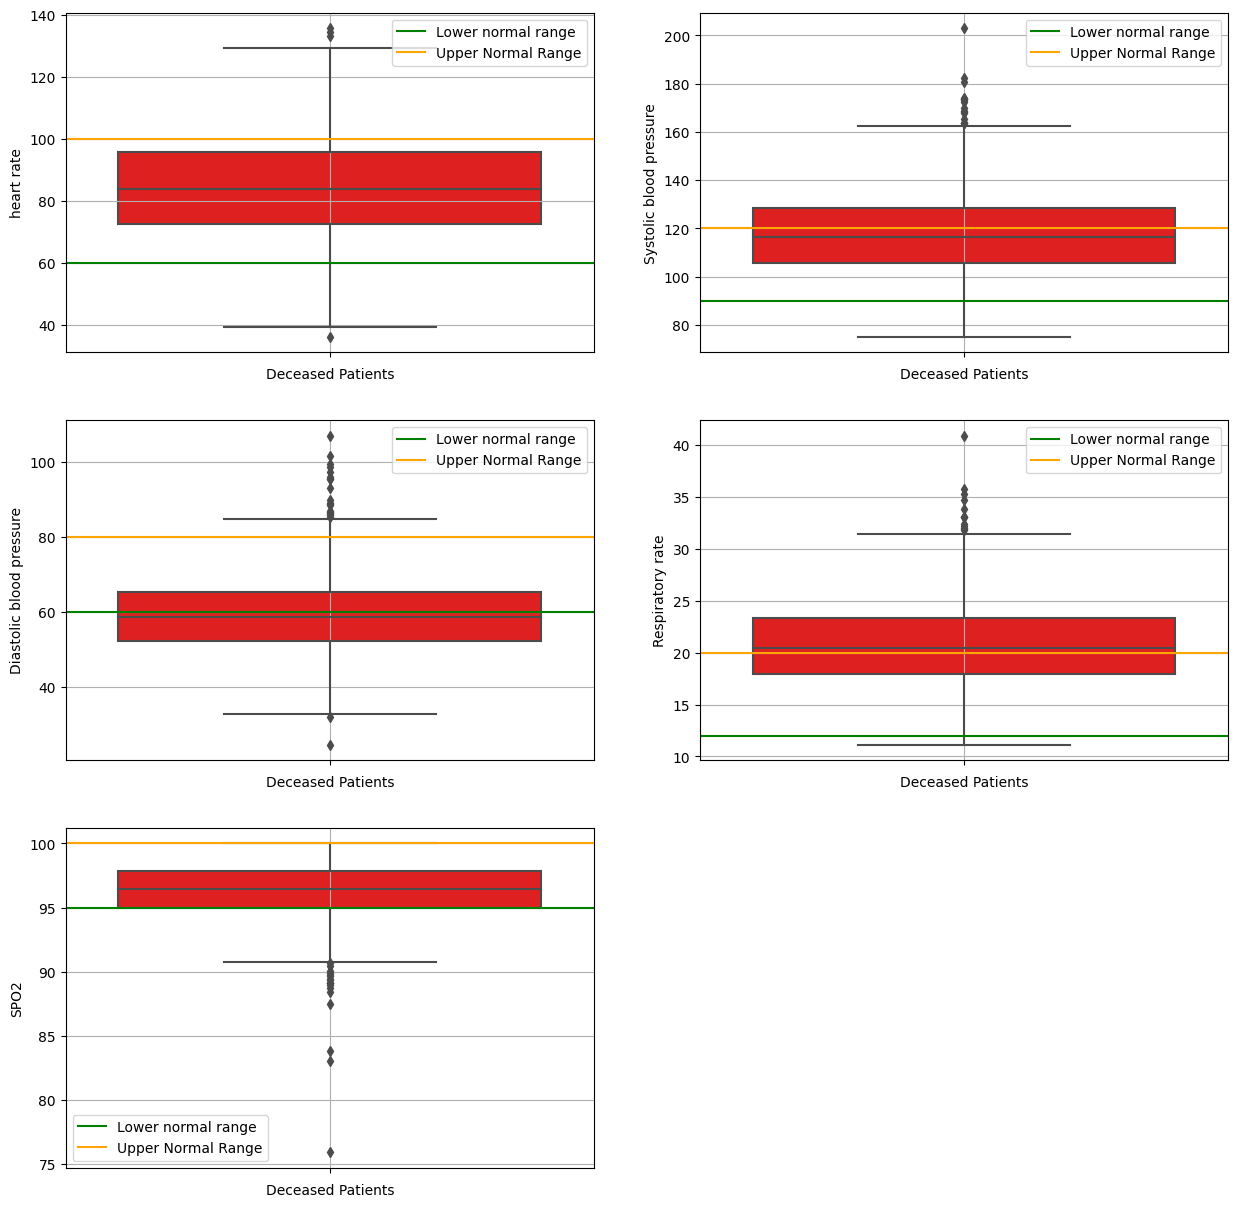

In [245]:
#plotting the box plots for each vital sign
plt.figure(figsize=(15,15))
for i, (vital, normal) in enumerate(normal_range.items(), 1):
    plt.subplot(3,2,i)
    sns.boxplot(data=df, y=vital, color='r')
    plt.axhline(y=normal[0], color='g', label='Lower normal range')
    plt.axhline(y=normal[1], color='orange', label='Upper Normal Range')
    plt.xlabel('Deceased Patients')
    plt.ylabel(vital)
    plt.legend()
    plt.grid(True)

In [259]:
#Number of deceased patients with abnormal values
vital_signs = []
patient_count = []
death_rate = []
def count_abnormal(d):
    for vital, normal in normal_range.items():
        count = d[(d[vital]<normal[0]) | (d[vital]>normal[1])].shape[0]
        rate = round(count/deceased_df.shape[0]*100,2)
        vital_signs.append(vital)
        patient_count.append(count)
        death_rate.append(f'{rate}%')
    print('\nDeceased patient count and abnormal values')
    return pd.DataFrame({'Vital_Sign': vital_signs, 'Patient_Count': patient_count, 'Death_Rate': death_rate})
count_abnormal(deceased_df)


Deceased patient count and abnormal values


,Vital_Sign,Patient_Count,Death_Rate
0,heart rate,43,27.04%
1,Systolic blood pressure,54,33.96%
2,Diastolic blood pressure,104,65.41%
3,Respiratory rate,97,61.01%
4,SPO2,46,28.93%


#### Insights:
1. #### Diastolic Blood Pressure:

 - The majority of deceased patients (65.41%) had abnormal diastolic blood pressure values, which were either too low or too high. This suggests a potential association between abnormal diastolic blood pressure and mortality.
2. #### Respiratory Rate:

 - A significant proportion of deceased patients (61.01%) had abnormal respiratory rates, indicating breathing difficulties. This finding highlights the importance of respiratory assessment and management in critically ill patients.
3. #### Systolic Blood Pressure:

 - About one-third of deceased patients (33.96%) had abnormal systolic blood pressure values, which may indicate cardiovascular instability or poor perfusion.
4. #### Heart Rate and SPO2:

 - Although still noteworthy, a smaller percentage of deceased patients had abnormal heart rates (27.04%) and oxygen saturation levels (28.93%). However, abnormalities in these vital signs should not be overlooked, as they can also contribute to adverse outcomes in critically ill patients.

## Prevalance of Medical conditions

In [283]:
#Filtering the conditions and outcome columns from the data
conditions_df = df.drop(['ID', 'age', 'gender', 'BMI', 'heart rate', 'Systolic blood pressure', 'Diastolic blood pressure', 'Respiratory rate', 'temperature', 'SPO2', 'age_group'], axis=1)
outcome_map = {1: 'Prevalance in Deceased', 0: 'Prevalance in Alive'}

conditions_df['outcome'] = conditions_df['outcome'].map(outcome_map)

#Claculating the prevalance of conditions in alive and deceased patients
conditions_prevalance = (conditions_df.groupby('outcome').mean().round(4)*100).reset_index()

#Transposing the data for better visualization
conditions_prevalance = conditions_prevalance.set_index('outcome').transpose()
conditions_prevalance

outcome,Prevalance in Alive,Prevalance in Deceased
hypertensive,73.08,63.52
atrialfibrillation,43.12,57.86
CHD with no MI,8.74,7.55
diabetes,43.12,35.85
deficiencyanemias,35.76,22.01
depression,12.67,6.92
Hyperlipemia,39.00,31.45
Renal failure,38.61,23.27
COPD,8.06,4.40


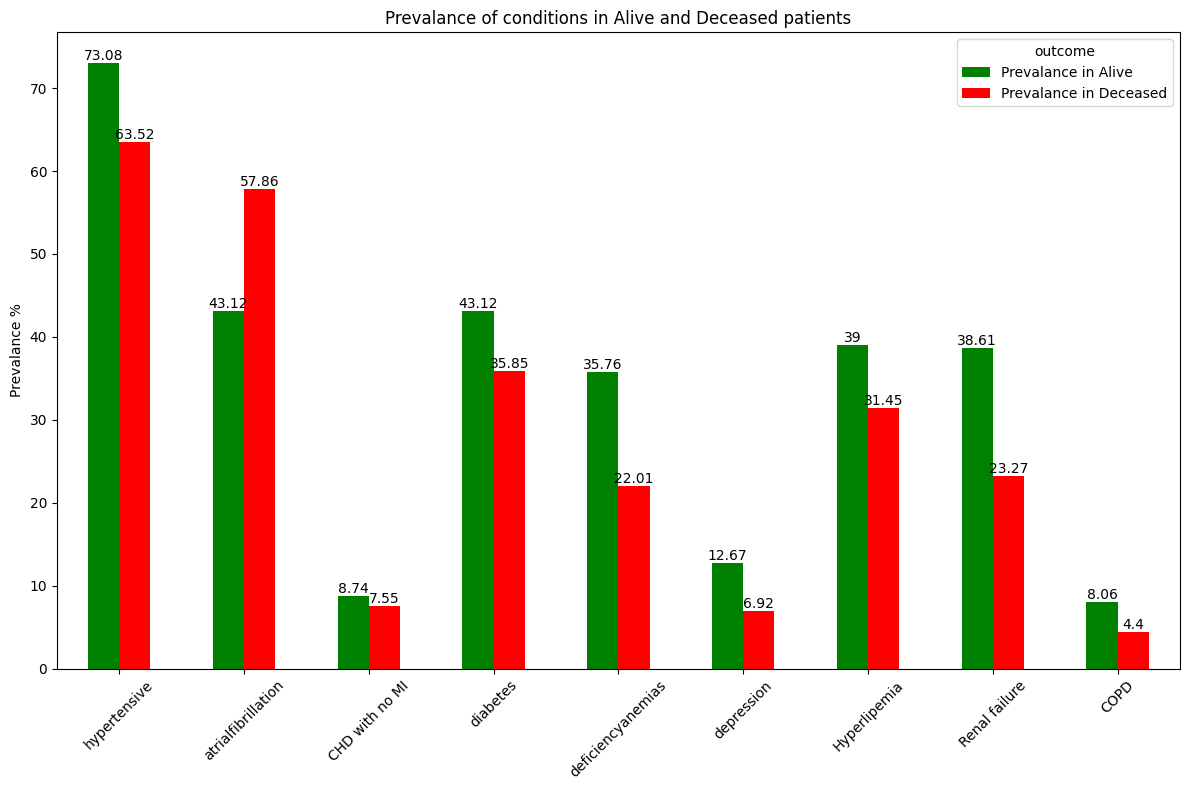

In [312]:
#Plotting the prevalance of conditions for visualization
ax = conditions_prevalance.plot(kind='bar', figsize=(12,8), color=['g', 'r'])
for i in ax.containers:
    ax.bar_label(i, fontsize=10)
plt.title('Prevalance of conditions in Alive and Deceased patients')
plt.ylabel('Prevalance %')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Insights
1. #### Hypertension:

 - Prevalence among deceased patients: 63.52%
 - Prevalence among survivors: 73.08%
 - Despite a lower prevalence among deceased patients compared to survivors, hypertension remains relatively common among both groups. This suggests that while hypertension may contribute to mortality risk, it is not the sole determinant of patient outcomes.
2. #### Atrial Fibrillation:

 - Prevalence among deceased patients: 57.86%
 - Prevalence among survivors: 43.12%
 - Atrial fibrillation appears to be more prevalent among deceased patients compared to survivors, indicating its potential association with higher mortality rates. Monitoring and management of atrial fibrillation may be crucial in improving patient outcomes.
3. #### CHD with no MI (Coronary Heart Disease):

 - Prevalence among deceased patients: 7.55%
 - Prevalence among survivors: 8.74%
 - The prevalence of CHD without myocardial infarction (heart attack) is relatively low in both groups. While CHD is a significant risk factor for adverse cardiovascular events, its prevalence alone may not fully explain mortality rates.
4. #### Diabetes:

 - Prevalence among deceased patients: 35.85%
 - Prevalence among survivors: 43.12%
 - Diabetes is less prevalent among deceased patients compared to survivors. However, it remains a common comorbidity in both groups, highlighting the importance of glycemic control and diabetes management in patient care.
5. #### Deficiency Anemias:

 - Prevalence among deceased patients: 22.01%
 - Prevalence among survivors: 35.76%
 - Deficiency anemias exhibit a lower prevalence among deceased patients compared to survivors. Nonetheless, they are still notable comorbidities, emphasizing the need for proper management, particularly in patients at higher risk of mortality.
6. #### Depression:

 - Prevalence among deceased patients: 6.92%
 - Prevalence among survivors: 12.67%
 - Depression appears to be less prevalent among deceased patients compared to survivors. While mental health conditions may influence patient outcomes, their impact on mortality rates in this dataset seems relatively lower.
7. #### Hyperlipemia:

 - Prevalence among deceased patients: 31.45%
 - Prevalence among survivors: 39.00%
 - Hyperlipemia, characterized by high lipid levels in the blood, exhibits a lower prevalence among deceased patients compared to survivors. However, it remains a common condition in both groups and warrants attention in patient management.
8. #### Renal Failure:

 - Prevalence among deceased patients: 23.27%
 - Prevalence among survivors: 38.61%
 - Renal failure appears to be more prevalent among survivors compared to deceased patients. Nonetheless, its presence among deceased patients highlights the importance of renal function monitoring and management in improving patient outcomes.
9. #### COPD (Chronic Obstructive Pulmonary Disease):

 - Prevalence among deceased patients: 4.40%
 - Prevalence among survivors: 8.06%
 - COPD exhibits a lower prevalence among deceased patients compared to survivors. While COPD is a significant risk factor for respiratory complications, its prevalence alone may not fully explain mortality rates in this dataset.

In [326]:
#Performing Chi2 Test on the medical conditions vs outcomes
p_values = {}
for condition in conditions:
    contingency_table = pd.crosstab(df['outcome'], df[condition])
    chi2, p, _, _ = chi2_contingency(contingency_table)
    p_values[condition] = p

#Filtering out the significant conditions with p_values less than 0.05
significant_conditions = [condition for condition, p_value in p_values.items() if p_value <0.05]
for condition in significant_conditions:
    print(f'Significant conditions:\n\nChi-square test for {condition}:\np_value = {p_values[condition]}\n')

Significant conditions:

Chi-square test for hypertensive:
p_value = 0.016522339771294824

Significant conditions:

Chi-square test for atrialfibrillation:
p_value = 0.0007052466776463767

Significant conditions:

Chi-square test for deficiencyanemias:
p_value = 0.0009173243680206023

Significant conditions:

Chi-square test for Renal failure:
p_value = 0.00026632954872149277



#### Insights:
- Atrial fibrillation, renal failure, deficiency anemias, hypertension, and depression are the medical conditions that show statistically significant differences in prevalence between deceased and alive patients.
- These conditions, especially atrial fibrillation and renal failure, may play crucial roles in contributing to higher mortality rates among patients. Therefore, close monitoring and appropriate management of these conditions are essential in patient care, particularly for those at higher risk of adverse outcomes.

# Overall Insights and Recommendations

Based on the comprehensive analysis of mortality rates, admission trends, prevalence of medical conditions, comorbidity patterns, and vital signs, several insights and recommendations can be drawn to improve patient care and outcomes:

### 1. Age and Gender Considerations:

 - Mortality rates vary significantly across different age groups and genders, with older adults generally experiencing higher mortality rates.
 - Geriatric care should be prioritized, with specialized attention to the 71-90 age range, where the majority of admissions occur.
 - Gender-specific differences in mortality rates highlight the importance of tailored healthcare interventions and preventive strategies.

### 2. Resource Allocation and Geriatric Care:

 - Given the high admission rates in older age groups, resources should be allocated to enhance geriatric care, including specialized staff training, medication supply, and equipment for older patients.
 - Chronic disease management programs should be strengthened to address prevalent conditions like hypertension, diabetes, and renal failure among admitted patients.

### 3. Prevalence of Medical Conditions:

 - Hypertension, atrial fibrillation, and diabetes are highly prevalent among admitted patients, requiring comprehensive management strategies.
 - Close monitoring and management of hyperlipemia, renal failure, and deficiency anemias are essential due to their moderate prevalence and potential impact on patient outcomes.
 - Although depression and COPD exhibit lower prevalence rates, they should not be overlooked, and appropriate support and interventions should be provided to affected patients.

### 4. Comorbidity and Mortality Risk:

 - Significant associations between certain medical conditions, such as hypertension and hyperlipemia, suggest a combined impact on mortality risk.
 - Close monitoring and management of conditions with strong correlations, such as hypertension and renal failure, are crucial to mitigate adverse outcomes.

### 5. Vital Signs and Mortality Risk:

 - Abnormal vital signs, particularly abnormal diastolic blood pressure, respiratory rate, and systolic blood pressure, are associated with higher mortality risk and require prompt clinical attention.
 - Regular monitoring of vital signs and timely intervention can help identify and address potential complications in admitted patients.

### 6. Prevalence Disparities between Deceased and Alive Patients:

 - Conditions with notable differences in prevalence between deceased and alive patients, such as atrial fibrillation and renal failure, should be closely monitored and managed to improve patient outcomes.

### 7. Integrated Healthcare Approach:

 - An integrated healthcare approach involving multidisciplinary teams, advanced diagnostics, and evidence-based interventions is essential to address the complex needs of hospitalized patients and reduce mortality rates.
 - By implementing these insights and recommendations, healthcare facilities can enhance patient care, optimize resource utilization, and ultimately improve outcomes for hospitalized patients.